In [6]:
from textblob import TextBlob
import pandas as pd

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

datas = pd.read_csv("objectivity_training_dataset.csv")
print(datas.columns)
datas['labels'] = datas.Category.apply(lambda x:0  if x == 'sub' else 1 )



Index(['Category', 'Message'], dtype='object')


In [7]:
datas['obj_probability'] = datas['Message'].apply(lambda x: 1 - TextBlob(x).sentiment.subjectivity)
datas['obj_label'] = datas['obj_probability'].apply(lambda x: 1 if x > 0.5 else 0)

test_accuracy = accuracy_score(datas['labels'], datas['obj_label'])
print(test_accuracy)

from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(datas['labels'], datas['obj_label'])
print(cm)

#datas.to_csv("textblob_obj.csv", encoding='utf-8-sig')

0.5817
[[2892 2108]
 [2075 2925]]


              precision    recall  f1-score   support

           0       0.58      0.58      0.58      5000
           1       0.58      0.58      0.58      5000

    accuracy                           0.58     10000
   macro avg       0.58      0.58      0.58     10000
weighted avg       0.58      0.58      0.58     10000



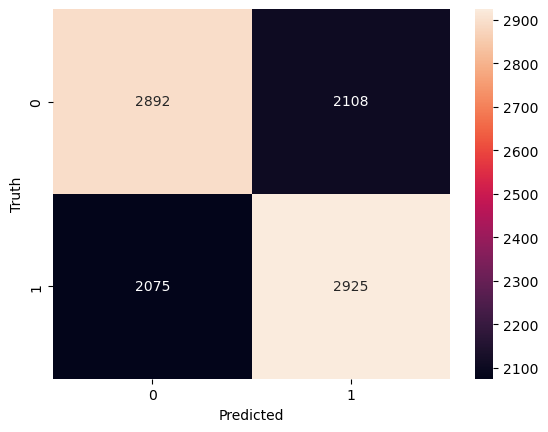

In [8]:
from matplotlib import pyplot as plt
import seaborn as sn
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
#plt.show()

print(classification_report(datas['labels'], datas['obj_label']))